HW#1 詞頻分析

1. 請先使⽤用分詞工具 斷詞

2. 統計前一百個高頻和TF-IDF權重高的字詞 

3. 計算並畫出其統計圖型 (2個圖)

3.1. 一行算一個文章

3.2. x軸 字詞編號
     y軸 權重 fig#1和 出現頻率 fig#2 

3.3. y軸 要sort過 取前100個

In [115]:
import jieba
import re
from collections import Counter

jieba.set_dictionary('dict.txt.big')  # 加入繁體中文詞庫

word_data = []  # 紀錄每個詞的資料
num_of_words_in_lines = []  # 每一行有幾個詞
line_num = 0  # 行數(文章數)

for line in open('cut-dataset.txt',encoding='utf-8'):
    line = re.sub("[A-Za-z0-9\：\·\—\，\。\“ \”\.\？\?\(]", "", line)
    seg_list=jieba.lcut(line,cut_all=False) # 斷詞
    c=Counter()  # 某個詞在某行有幾個
    num_of_words = 0  # 某行有幾個詞
    for word in seg_list:
        if word != '\r\n' and word != '\n' and word != '\t' and word != '\u3000':
            c[word] += 1
            num_of_words = num_of_words + 1
    items = []  # 詞
    items = list(c.items())  
    items.sort(key=lambda x:x[1], reverse=True)  # 照詞出現的多寡排序
    word_data += (items, )
    num_of_words_in_lines += (num_of_words, )
    line_num = line_num + 1
print('詞/在那行出現次數:\n')
for i in range(line_num):
    print(word_data[i])

Building prefix dict from /Users/joanna/Desktop/nlp_hw1/dict.txt.big ...
Loading model from cache /var/folders/vf/krhn1yxd4qzc9qr3b221ndq40000gn/T/jieba.ufa192bc550b892ddf524a9bf3a225c1b.cache
Loading model cost 1.045 seconds.
Prefix dict has been built successfully.


詞/在那行出現次數:

[('這群', 2), ('人', 2), ('為', 1), ('什麼', 1), ('聖', 1), ('結石', 1), ('會', 1), ('被', 1), ('酸', 1), ('而', 1), ('不會', 1), ('質感', 1), ('劇本', 1), ('成員', 1), ('都', 1), ('差', 1), ('很多', 1), ('好', 1), ('嗎', 1), ('不要', 1), ('拿', 1), ('腎結石', 1), ('來', 1), ('污辱', 1)]
[('人', 2), ('為', 1), ('什麼', 1), ('慶祝會', 1), ('被', 1), ('罵', 1), ('可是', 1), ('慶', 1), ('端午', 1), ('不會', 1), ('因為', 1), ('屈原', 1), ('不是', 1), ('台灣', 1), ('是', 1), ('楚國', 1)]
[('阿瑞斯', 2), ('有沒有', 1), ('戰神', 1), ('的', 1), ('八卦', 1), ('爵士', 1), ('就是', 1), ('男主角', 1), ('最後', 1), ('死', 1), ('了', 1)]
[('脫節', 3), ('最', 2), ('的', 2), ('系', 2), ('不', 2), ('理論', 1), ('與', 1), ('實務', 1), ('哪個', 1), ('你問', 1), ('簡單', 1), ('多', 1), ('了', 1)]
[('看', 2), ('棒球', 2), ('為', 1), ('什麼', 1), ('這麼', 1), ('多人', 1), ('肥宅', 1), ('才', 1), ('系壘', 1), ('一堆', 1), ('胖子', 1)]
[('達摩', 2), ('為', 1), ('什麼', 1), ('祖師', 1), ('傳', 1), ('那麼', 1), ('好看', 1), ('從頭到尾', 1), ('都', 1), ('是', 1), ('被動', 1), ('別人', 1), ('問他', 1), ('問題', 1)]
[('小', 2), ('有人', 2), ('會畫', 2),

In [116]:
import math

TF = 0  # 計算各行各個詞的詞頻
for i in range(line_num):
    for j in range(len(word_data[i])):
        TF = word_data[i][j][1] / num_of_words_in_lines[i]  # 一個詞出現在一個文件的頻率
        word_data[i][j] += (TF, )

in_how_many_line = {}  # 計算各個詞在幾行(幾篇文章)有出現
for i in range(line_num):
    for j in range(len(word_data[i])):
        in_how_many_line[word_data[i][j][0]] = in_how_many_line.get(word_data[i][j][0],0) + 1
        
for i in range(line_num):
    for j in range(len(word_data[i])):
        word_data[i][j] += (in_how_many_line[word_data[i][j][0]], )
        
for i in range(line_num):  # IDF
    for j in range(len(word_data[i])):
        word_data[i][j] += (math.log(line_num/word_data[i][j][3]), )  # 所有文件中含有這個詞之數量的倒數

for i in range(line_num):  # TF-IDF
    for j in range(len(word_data[i])):
        word_data[i][j] += (word_data[i][j][2] * word_data[i][j][4], )

print('詞/在那行出現次數/TF/在幾篇文章出現/IDF/TF-IDF:\n')
for i in range(line_num):
    print(word_data[i])

詞/在那行出現次數/TF/在幾篇文章出現/IDF/TF-IDF:

[('這群', 2, 0.07692307692307693, 1, 3.4011973816621555, 0.2616305678201658), ('人', 2, 0.07692307692307693, 5, 1.791759469228055, 0.13782765147908116), ('為', 1, 0.038461538461538464, 4, 2.0149030205422647, 0.07749627002085634), ('什麼', 1, 0.038461538461538464, 7, 1.455287232606842, 0.05597258586949393), ('聖', 1, 0.038461538461538464, 1, 3.4011973816621555, 0.1308152839100829), ('結石', 1, 0.038461538461538464, 1, 3.4011973816621555, 0.1308152839100829), ('會', 1, 0.038461538461538464, 5, 1.791759469228055, 0.06891382573954058), ('被', 1, 0.038461538461538464, 5, 1.791759469228055, 0.06891382573954058), ('酸', 1, 0.038461538461538464, 1, 3.4011973816621555, 0.1308152839100829), ('而', 1, 0.038461538461538464, 1, 3.4011973816621555, 0.1308152839100829), ('不會', 1, 0.038461538461538464, 2, 2.70805020110221, 0.10415577696546963), ('質感', 1, 0.038461538461538464, 1, 3.4011973816621555, 0.1308152839100829), ('劇本', 1, 0.038461538461538464, 1, 3.4011973816621555, 0.13081

In [117]:
finaldata = []

for i in range(line_num):
    for j in range(len(word_data[i])):
        finaldata.append((word_data[i][j]))

In [127]:
finaldata.sort(key=lambda x:x[5], reverse=True)  # 依TF-IDF排序

TF_IDF_oh = []  # TF-IDF取前100
already = 0  # 計算已經取出幾個詞了
no = 0  # 要取第幾個finaldata
while(already <= 100):
    repeat_or_not = 0  # 看有無重複
    for j in range(already):
        if already!=0:
            if finaldata[no][0] == TF_IDF_oh[j][0]:  # 欲放入和已放入重複
                no = no+1
                repeat_or_not = 1
                break
    if repeat_or_not == 0:  # 沒重複
        TF_IDF_oh.append(finaldata[no])  # 放入那個詞
        no = no+1
        already = already+1

for i in range(100):
    print(TF_IDF_oh[i])

('小', 2, 0.2, 1, 3.4011973816621555, 0.6802394763324311)
('會畫', 2, 0.2, 1, 3.4011973816621555, 0.6802394763324311)
('機車', 2, 0.18181818181818182, 1, 3.4011973816621555, 0.6183995239385738)
('貓貓', 2, 0.18181818181818182, 1, 3.4011973816621555, 0.6183995239385738)
('阿瑞斯', 2, 0.16666666666666666, 1, 3.4011973816621555, 0.5668662302770259)
('有人', 2, 0.2, 2, 2.70805020110221, 0.541610040220442)
('脫節', 3, 0.15789473684210525, 1, 3.4011973816621555, 0.5370311655256035)
('棒球', 2, 0.15384615384615385, 1, 3.4011973816621555, 0.5232611356403316)
('啊', 2, 0.15384615384615385, 1, 3.4011973816621555, 0.5232611356403316)
('國歌', 3, 0.15, 1, 3.4011973816621555, 0.5101796072493233)
('搖搖', 2, 0.14285714285714285, 1, 3.4011973816621555, 0.4858853402374508)
('吃', 3, 0.14285714285714285, 1, 3.4011973816621555, 0.4858853402374508)
('達摩', 2, 0.13333333333333333, 1, 3.4011973816621555, 0.4534929842216207)
('原住民', 2, 0.13333333333333333, 1, 3.4011973816621555, 0.4534929842216207)
('又', 3, 0.16666666666666666, 2

In [128]:
import matplotlib.pyplot as plt

def draw1(word_no_show, tf_idfscore_show):
    plt.plot(word_no_show, tf_idfscore_show)
    plt.xlabel('Word No') # 設定x軸標題
    plt.ylabel('Weight')
    plt.title('tf-idf') # 設定圖表標題
    plt.show()

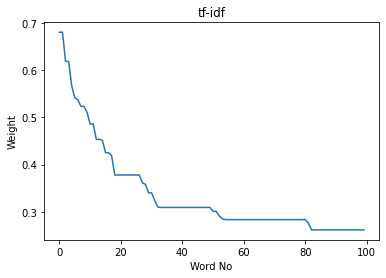

In [129]:
x_label = []
y_label = []

for i in range(100):
    x_label.append(i)
    y_label.append(TF_IDF_oh[i][5])

draw1(x_label, y_label)

In [130]:
finaldata.sort(key=lambda x:x[2], reverse=True)  # 依TF排序

TF_oh = []  # TF取前100
already = 0
no = 0
while(already<=100):
    repeat_or_not = 0
    for j in range(already):
        if already!=0:
            if finaldata[no][0] == TF_oh[j][0]:
                no = no+1
                repeat_or_not = 1
                break
    if repeat_or_not == 0:
        TF_oh.append(finaldata[no])
        no = no+1
        already = already+1

for i in range(100):
    print(TF_oh[i])

('小', 2, 0.2, 1, 3.4011973816621555, 0.6802394763324311)
('會畫', 2, 0.2, 1, 3.4011973816621555, 0.6802394763324311)
('有人', 2, 0.2, 2, 2.70805020110221, 0.541610040220442)
('嗎', 2, 0.2, 7, 1.455287232606842, 0.2910574465213684)
('機車', 2, 0.18181818181818182, 1, 3.4011973816621555, 0.6183995239385738)
('貓貓', 2, 0.18181818181818182, 1, 3.4011973816621555, 0.6183995239385738)
('肥宅', 2, 0.18181818181818182, 3, 2.302585092994046, 0.41865183508982656)
('阿瑞斯', 2, 0.16666666666666666, 1, 3.4011973816621555, 0.5668662302770259)
('又', 3, 0.16666666666666666, 2, 2.70805020110221, 0.4513417001837017)
('脫節', 3, 0.15789473684210525, 1, 3.4011973816621555, 0.5370311655256035)
('棒球', 2, 0.15384615384615385, 1, 3.4011973816621555, 0.5232611356403316)
('啊', 2, 0.15384615384615385, 1, 3.4011973816621555, 0.5232611356403316)
('看', 2, 0.15384615384615385, 4, 2.0149030205422647, 0.30998508008342535)
('都', 2, 0.15384615384615385, 5, 1.791759469228055, 0.2756553029581623)
('的', 2, 0.15384615384615385, 17, 0.567

In [131]:
def draw2(word_no_show, tf_idfscore_show):
    plt.plot(word_no_show, tf_idfscore_show)
    plt.xlabel('Word No') # 設定x軸標題
    plt.ylabel('Freq')
    plt.title('tf') # 設定圖表標題
    plt.show()

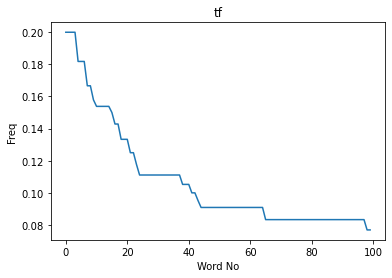

In [132]:
x_label = []
y_label = []

for i in range(100):
    x_label.append(i)
    y_label.append(TF_oh[i][2])

draw2(x_label, y_label)